In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat
from os.path import join as path_join
import seaborn as sns
%matplotlib inline

IMAGES_DIR = 'Images'

In [2]:
df = pd.read_csv('GWAS_clinical.csv')

In [3]:
df.head()

,FamID,CAD,sex,age,tg,hdl,ldl
0,10002,1,1,60,NaN,NaN,NaN
1,10004,1,2,50,55.0,23.0,75.0
2,10005,1,1,55,105.0,37.0,69.0
3,10007,1,1,52,314.0,54.0,108.0
4,10008,1,1,58,161.0,40.0,94.0


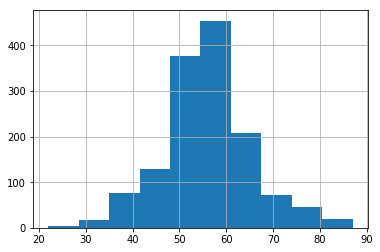

In [4]:
df['age'].hist()

In [7]:
# HDL grouped by CAD difference checking with t test and wmw test
hdl_cad = df.groupby(['CAD'])['hdl'].agg(list)

r1 = np.array(hdl_cad[0])
r1 = r1[np.logical_not(np.isnan(r1))]
r2 = np.array(hdl_cad[1])
r2 = r2[np.logical_not(np.isnan(r2))]
s, p = stat.ttest_ind(r1, r2)
print("HDL T-test:", p)
s, p = stat.mannwhitneyu(r1, r2)
print("HDL WMW-test:", p)
hdl_p = p

# LDL grouped by CAD difference checking with t test
hdl_cad = df.groupby(['CAD'])['ldl'].agg(list)

r1 = np.array(hdl_cad[0])
r1 = r1[np.logical_not(np.isnan(r1))]
r2 = np.array(hdl_cad[1])
r2 = r2[np.logical_not(np.isnan(r2))]
s, p = stat.ttest_ind(r1, r2)
print("LDL T-test:", p)
s, p = stat.mannwhitneyu(r1, r2)
print("LDL WMW-test:", p)
ldl_p = p


# TG grouped by CAD difference checking with t test
hdl_cad = df.groupby(['CAD'])['tg'].agg(list)

r1 = np.array(hdl_cad[0])
r1 = r1[np.logical_not(np.isnan(r1))]
r2 = np.array(hdl_cad[1])
r2 = r2[np.logical_not(np.isnan(r2))]
s, p = stat.ttest_ind(r1, r2)
print("TG T-test:", p)
s, p = stat.mannwhitneyu(r1, r2)
print("TG WMW-test:", p)
tg_p = p

HDL T-test: 3.179167258382557e-20
HDL WMW-test: 8.609335702177499e-19
LDL T-test: 0.5533302168802736
LDL WMW-test: 0.05096286132930089
TG T-test: 6.254538177553909e-12
TG WMW-test: 1.9717600203129928e-20


/home/alexey/anaconda3/lib/python3.7/site-packages/pandas/plotting/_tools.py:204: UserWarning: When passing multiple axes, layout keyword is ignored
  "ignored", UserWarning)
/home/alexey/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:2257: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  return_type=return_type, **kwds)


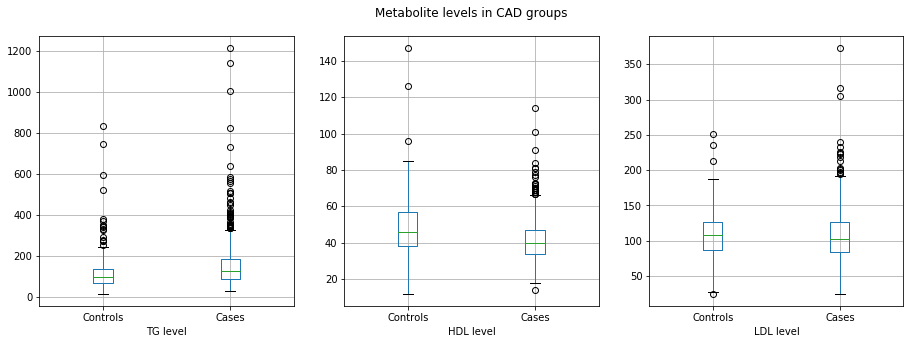

In [8]:
# Boxplot with different metabolite levels distinguished by CAD
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))
df.boxplot(column=['tg', 'hdl', 'ldl'], by='CAD', figsize=(15, 5), layout=(1, 3), ax=axs)

axs[0].set_title("")
axs[0].set_xlabel("TG level")

axs[1].set_title("")
axs[1].set_xlabel("HDL level")

axs[2].set_title("")
axs[2].set_xlabel("LDL level")

# Changing 0 and 1 to controls and cases
for ax in axs:
    labels = [item.get_text() for item in ax.get_xticklabels()]
    labels[0] = "Controls"
    labels[1] = "Cases"
    ax.set_xticklabels(labels)

plt.suptitle("Metabolite levels in CAD groups")
plt.savefig(path_join(IMAGES_DIR, 'boxplot-lipid_type-cad-level.png'))

/home/alexey/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


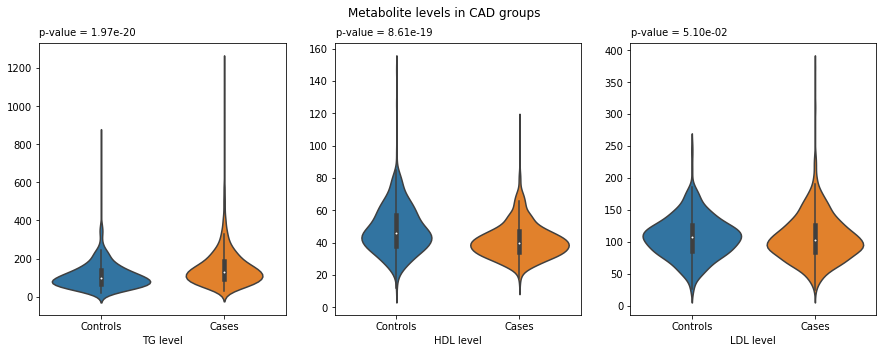

In [9]:
# Violinplot with different lipid levels distinguished by CAD
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))
sns.violinplot('CAD', 'tg',  data=df, ax=axs[0])
fig.canvas.draw()

axs[0].set_xlabel("TG level")
axs[0].set_ylabel("")

sns.violinplot('CAD', 'hdl',  data=df, ax=axs[1])
axs[1].set_xlabel("HDL level")
axs[1].set_ylabel("")

sns.violinplot('CAD', 'ldl',  data=df, ax=axs[2])
axs[2].set_xlabel("LDL level")
axs[2].set_ylabel("")

plt.suptitle("Metabolite levels in CAD groups")

# Changing 0 and 1 to controls and cases
for ax in axs:
    labels = [item.get_text() for item in ax.get_xticklabels()]
    labels[0] = "Controls"
    labels[1] = "Cases"
    ax.set_xticklabels(labels)
    
plt.figtext(0.125, 0.9, "p-value = {:0.2e}".format(tg_p))
plt.figtext(0.4, 0.9, "p-value = {:0.2e}".format(hdl_p))
plt.figtext(0.6725, 0.9, "p-value = {:0.2e}".format(ldl_p))

plt.savefig(path_join(IMAGES_DIR, 'violinplot-lipid_type-cad-level.png'))